## Business Understanding

- Key Stakeholder is **HelloFresh**
- Society as a whole has been trending to delivery services so it saves "you" the consumer time and lessens human interaction
    - We see this in many facets of life i.e (Car Services, online food ordering services and reservation services) 
- Hello Fresh takes a different approach than online food delivery like Fresh Direct 
    - Hello Fresh lets you pick a food plan and then they send you a kit with all ingredients weighed out and portioned for you to make
- Now that the business has reached a mass produced scale it is important to streamline the process but still having quality food at the same time
- This is where image classification can play a key role in whether or not identifying beef as fresh or rotten
- The vision of where to implement this classifier is in cameras that take pictures of meat as they are flowing down the conveyer belt
    - The camera will snap a picture that then is run through my model and classified as fresh or rotten
- This classifier can save money as you want have to use wharehouse workers to check the beef quality and uphold you reputation as the top online food service

## Data Understanding

- The data comes from this [website](https://data.mendeley.com/datasets/nhs6mjg6yy/1)
- It has about 3000 images of raw beef some being fresh and some being rotten
- Some potential limitations is the amount of data I have; it couls be more accurate with more training data

In [1]:
# Packages needed for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Loading in the Images

In [2]:
# Creating a train generator
# Will use this for my first simple model
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [3]:
# Creating a validation generator
# Will use this for my first simple model
validation_generator = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [4]:
# Creating a test generator
test_dir = '\\Users\\somdd\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\test\\test'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    shuffle = False)                                                 

Found 980 images belonging to 2 classes.


In [5]:
train_generator.image_shape

(224, 224, 3)

## Taking a look at the images

In [6]:
# Looking at the counts for each label to make sure they are balanced in the train set
meat_labels = train_generator.classes
meat_label, meat_count = np.unique(meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(meat_label, meat_count))))

Meat Quality [(0, 916), (1, 916)]


In [7]:
# Looking at the class names for the indices
train_generator.class_indices

{'fresh': 0, 'rotten': 1}

In [8]:
# Looking at the counts for each label to make sure they are balanced in the test set
test_meat_labels = test_generator.classes
test_meat_label, test_meat_count = np.unique(test_meat_labels, return_counts=True)
print('Meat Quality {}'.format(list(zip(test_meat_label, test_meat_count))))

Meat Quality [(0, 490), (1, 490)]


In [9]:
# Creating a function so I can pull up an image and its directory
def print_image(condition, index):
    # viable condition inputs are "R/rotten" and "F/fresh"
    image = os.listdir('\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}'.format(condition))[index]
    print(image)
    path = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train\\{}\\{}'.format(condition,image)
    print(path)
    plt.imshow(tf.keras.utils.load_img(path, target_size=(350, 750)))  

Rotten (1709).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\rotten\Rotten (1709).jpg


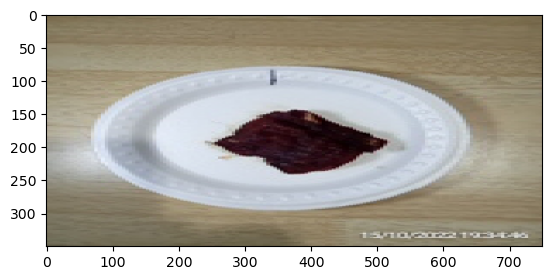

In [10]:
# Example of a rotten image
print_image('rotten', 30)

Fresh (100).jpg
\Users\somdd\Documents\Flatiron\Phase_5\Hello-Fresh\train\train\fresh\Fresh (100).jpg


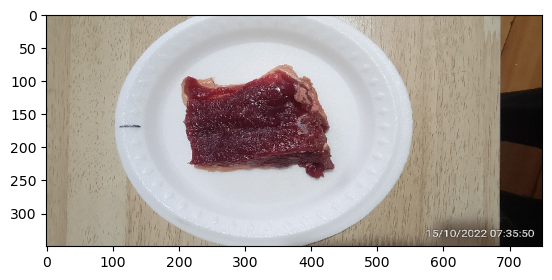

In [11]:
# Example of a fresh image
print_image('fresh', 1)

### Visualizing RGB Values for Fresh and Rotten Images

In [12]:
# To create an array with label and rgb values together
rgb, labels = train_generator.next()
zipped = list(zip(rgb,labels))

**If you run this different times it can change the order of "zipped" because it takes batches of 32 everytime.
This can lead to different visuals in distribution of rgb** 

In [13]:
# This will identify if the image is going to be fresh or rotten
# Fresh is 0.0
# Rotten is 1.0
print(zipped[0][1])
print(zipped[20][1])

1.0
0.0


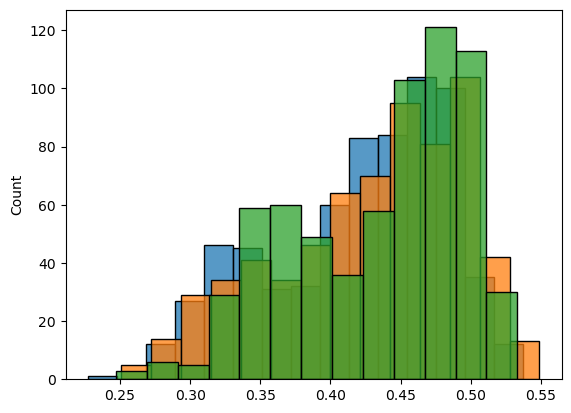

In [14]:
# Plotting the red, blue, and green values of the rotten image
sns.histplot(list(zipped[0][0][0].flatten()))
sns.histplot(list(zipped[0][0][1].flatten()))
sns.histplot(list(zipped[0][0][2].flatten()));

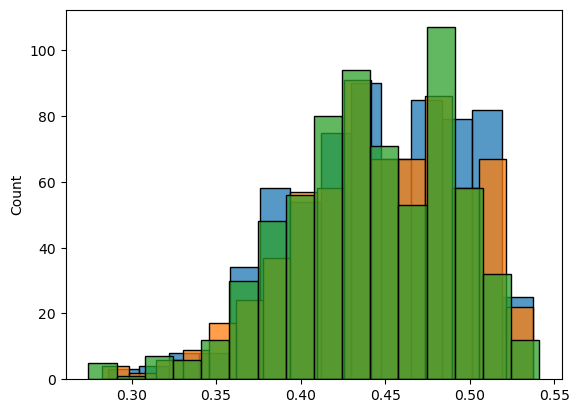

In [15]:
# Plotting the red, blue, and green values of the fresh image
sns.histplot(list(zipped[20][0][0].flatten()))
sns.histplot(list(zipped[20][0][1].flatten()))
sns.histplot(list(zipped[20][0][2].flatten()));

## Modeling

In [16]:
# Importing packages need for modeling
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

### FSM

In [17]:
# Building a first simple CNN
fsmodel = Sequential()
fsmodel.add(Conv2D(filters = 32, 
                   kernel_size = (4,4), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(MaxPooling2D(pool_size = (2,2)))
fsmodel.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same'))
fsmodel.add(Flatten())
fsmodel.add(Dense(32, activation = 'relu'))
fsmodel.add(Dense(1, activation = 'sigmoid'))
#fsmodel.summary()

In [18]:
# Compiling the layer and fitting the model
fsmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fsm_cnn = fsmodel.fit(train_generator, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator)

Epoch 1/20
20/20 [==============================] - 52s 3s/step - loss: 0.8774 - accuracy: 0.5344 - val_loss: 0.5892 - val_accuracy: 0.6206
Epoch 2/20
20/20 [==============================] - 51s 3s/step - loss: 0.3855 - accuracy: 0.8516 - val_loss: 0.2936 - val_accuracy: 0.8333
Epoch 3/20
20/20 [==============================] - 50s 3s/step - loss: 0.2502 - accuracy: 0.9109 - val_loss: 0.0503 - val_accuracy: 0.9978
Epoch 4/20
20/20 [==============================] - 50s 2s/step - loss: 0.1732 - accuracy: 0.9481 - val_loss: 0.1589 - val_accuracy: 0.9320
Epoch 5/20
20/20 [==============================] - 49s 2s/step - loss: 0.1101 - accuracy: 0.9692 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 52s 3s/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 48s 2s/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9978
Epoch 8/20
20/20 [==

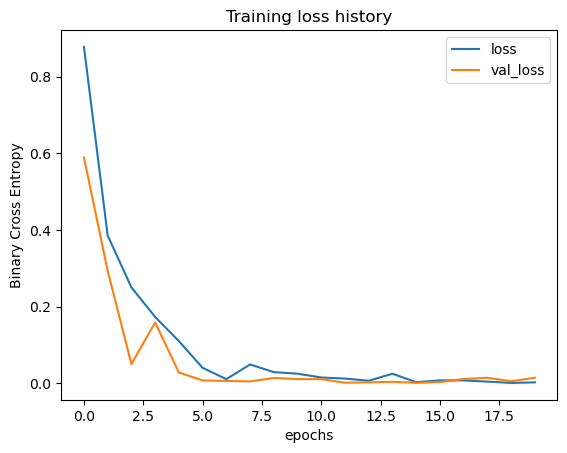

In [19]:
# Saving the model to a dataframe and plotting the loss history
fsm_cnn_df =  pd.DataFrame(fsm_cnn.history)
fsm_cnn_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
fsm_cnn_df[col_list].plot()
plt.ylabel('Binary Cross Entropy')
plt.title('Training loss history')
plt.show()

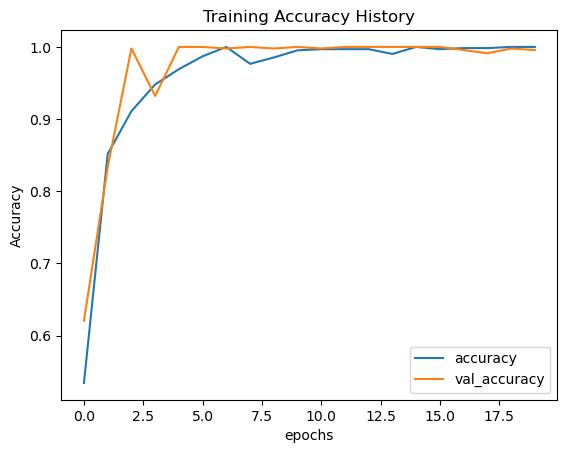

In [20]:
# Plotting the training accuracy
col_list = ['accuracy', 'val_accuracy']
fsm_cnn_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training Accuracy History')
plt.show()

In [21]:
# Evaluating the test accuracy and loss scores
test_loss, test_acc = fsmodel.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 46s 1s/step - loss: 0.0325 - accuracy: 0.9908
Test loss: 0.032534822821617126 Test Acc: 0.9908163547515869


In [22]:
# Predicting the test values
y_proba_fsm = fsmodel.predict(test_generator) 

31/31 [==============================] - 43s 1s/step


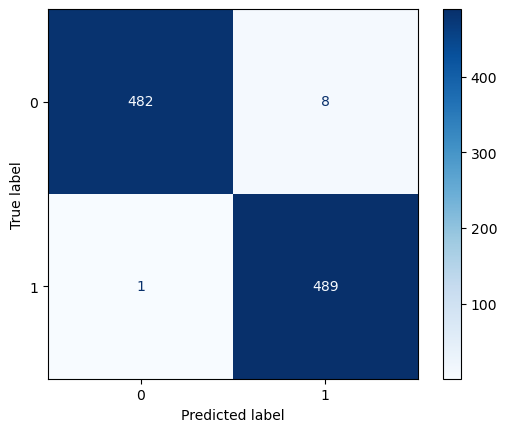

In [23]:
# Creating a confusion matrix to visualize how well my model predicts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_fsm = (y_proba_fsm > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_fsm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Surprisingly, the FSM seems to run pretty well and makes few mistakes. However the train generator has no data augmetation, not many dense layers and no regularization. Something I will be adding in my second model**

In [25]:
# Saving the fsm
fsmodel.save('fsm.keras')

### Second Model

In [26]:
# Creating a new train generator with some data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True, 
                                       validation_split = .2)
train_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )

Found 1832 images belonging to 2 classes.


In [27]:
# Creating a validation generator with some data augmentation
validation_generator_aug = train_datagen_aug.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )

Found 456 images belonging to 2 classes.


In [28]:
# Second CNN
model2 = Sequential()
model2.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Fitting the model
model2_history = model2.fit(train_generator_aug, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug)

Epoch 1/20
20/20 [==============================] - 54s 3s/step - loss: 0.9023 - accuracy: 0.5453 - val_loss: 0.6725 - val_accuracy: 0.5504
Epoch 2/20
20/20 [==============================] - 52s 3s/step - loss: 0.6084 - accuracy: 0.6948 - val_loss: 0.4511 - val_accuracy: 0.8640
Epoch 3/20
20/20 [==============================] - 53s 3s/step - loss: 0.4004 - accuracy: 0.8500 - val_loss: 0.1916 - val_accuracy: 0.9561
Epoch 4/20
20/20 [==============================] - 52s 3s/step - loss: 0.1626 - accuracy: 0.9422 - val_loss: 0.0890 - val_accuracy: 0.9649
Epoch 5/20
20/20 [==============================] - 53s 3s/step - loss: 0.1088 - accuracy: 0.9734 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 52s 3s/step - loss: 0.0506 - accuracy: 0.9903 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 51s 3s/step - loss: 0.0442 - accuracy: 0.9886 - val_loss: 0.1984 - val_accuracy: 0.9364
Epoch 8/20
20/20 [==

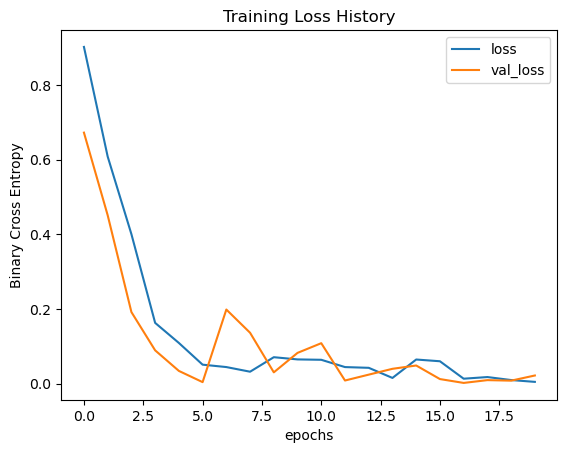

In [30]:
# Saving the model to a dataframe and plotting training loss history
model2_df = pd.DataFrame(model2_history.history)
model2_df.index.name = 'epochs'
col_list = ['loss', 'val_loss']
model2_df[col_list].plot()
plt.ylabel('Binary Cross Entropy')
plt.title('Training Loss History')
plt.show()

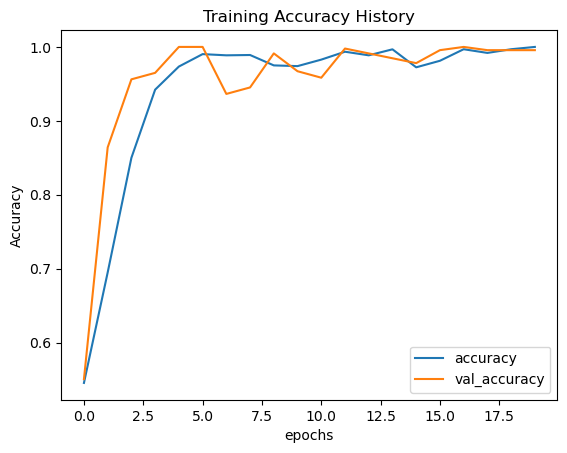

In [31]:
# plotting training accuracy history
col_list = ['accuracy', 'val_accuracy']
model2_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training Accuracy History')
plt.show()

In [32]:
# Evaluting the model accuracy and loss on the test set
test_loss, test_acc = model2.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 44s 1s/step - loss: 0.0264 - accuracy: 0.9908
Test loss: 0.02636254020035267 Test Acc: 0.9908163547515869


In [33]:
# Predicting the test values 
y_proba_2nd = model2.predict(test_generator) 

31/31 [==============================] - 43s 1s/step


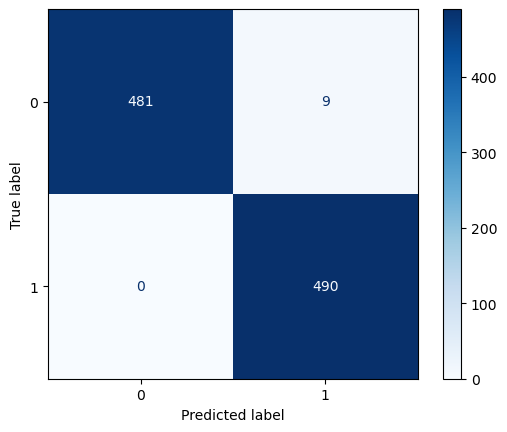

In [34]:
# Creating a confusion matrix to visualize how well my model predicts
y_pred_2nd = (y_proba_2nd > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_2nd)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**The model seemed to run slightly better than the first. It has the same accuracy as the test set but has a smaller loss. You can also see in the confusion matrix that it always predicts the rotten(1) label 100%**

## Third Model

In [35]:
# Creating a new train generator with more data augmentation
train_dir = '\\Users\\somdd\\Documents\\Flatiron\\Phase_5\\Hello-Fresh\\train\\train'
train_datagen_aug3 = ImageDataGenerator(rescale = 1./255, 
                                       horizontal_flip = True,
                                       vertical_flip =  True,
                                       rotation_range = 20,
                                       validation_split = .2)
train_generator_aug3 = train_datagen_aug3.flow_from_directory(train_dir, target_size = (224, 224),
                                                    color_mode = 'rgb', batch_size = 32,
                                                    class_mode = 'binary',
                                                    seed = 24,
                                                    subset = 'training'
                                                   )
# Creating a validation generator with data augmentation
validation_generator_aug3 = train_datagen_aug3.flow_from_directory(train_dir, target_size = (224, 224), 
                                                         color_mode = 'rgb', batch_size = 32,
                                                         class_mode = 'binary',
                                                         subset = 'validation',
                                                         seed = 24
                                                        )                 

Found 1832 images belonging to 2 classes.
Found 456 images belonging to 2 classes.


In [36]:
# Creating a CNN with more dense layers
model3 = Sequential()
model3.add(Conv2D(filters = 32, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   input_shape = (224, 224, 3), 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                 ))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(filters = 64, 
                   kernel_size = (3,3), 
                   activation = 'relu', 
                   padding = 'same', 
                ))

model3.add(Flatten())
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
model_3_history = model3.fit(train_generator_aug3, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug3)

Epoch 1/20
20/20 [==============================] - 64s 3s/step - loss: 0.9622 - accuracy: 0.4828 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 63s 3s/step - loss: 0.6901 - accuracy: 0.5562 - val_loss: 0.6283 - val_accuracy: 0.9583
Epoch 3/20
20/20 [==============================] - 64s 3s/step - loss: 0.5906 - accuracy: 0.6906 - val_loss: 0.2861 - val_accuracy: 0.8860
Epoch 4/20
20/20 [==============================] - 65s 3s/step - loss: 0.2751 - accuracy: 0.9016 - val_loss: 0.1171 - val_accuracy: 0.9561
Epoch 5/20
20/20 [==============================] - 66s 3s/step - loss: 0.2119 - accuracy: 0.9234 - val_loss: 0.2322 - val_accuracy: 0.9167
Epoch 6/20
20/20 [==============================] - 64s 3s/step - loss: 0.1145 - accuracy: 0.9641 - val_loss: 0.0527 - val_accuracy: 0.9803
Epoch 7/20
20/20 [==============================] - 65s 3s/step - loss: 0.1178 - accuracy: 0.9641 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 8/20
20/20 [==

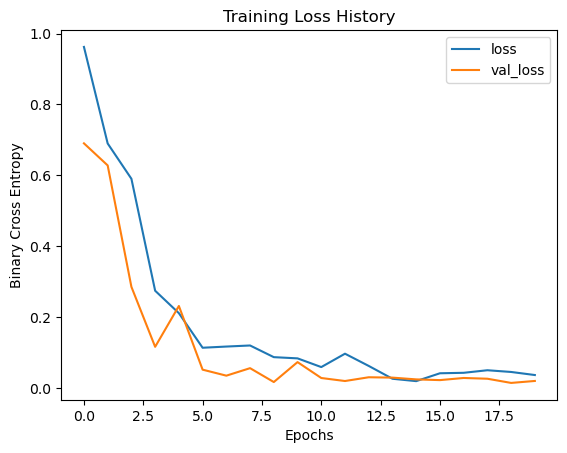

In [39]:
# Saving the model to a dataframe and plotting training loss history
model3_df = pd.DataFrame(model_3_history.history)
model3_df.index.name = 'Epochs'
col_list = ['loss', 'val_loss']
model3_df[col_list].plot()
plt.ylabel('Binary Cross Entropy')
plt.title('Training Loss History')
plt.show()

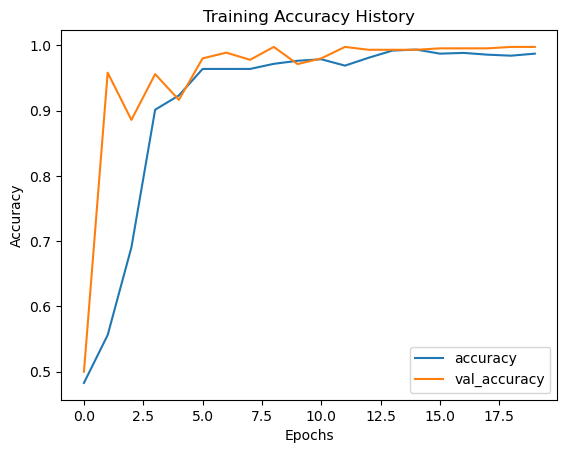

In [40]:
# plotting training accuracy history
col_list = ['accuracy', 'val_accuracy']
model3_df[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training Accuracy History')
plt.show()

In [41]:
# Evaluting the model accuracy and loss on the test set
test_loss, test_acc = model3.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 45s 1s/step - loss: 0.0061 - accuracy: 0.9980
Test loss: 0.006140260025858879 Test Acc: 0.9979591965675354


In [42]:
# Predicting the test values 
y_proba_3rd = model3.predict(test_generator) 

31/31 [==============================] - 43s 1s/step


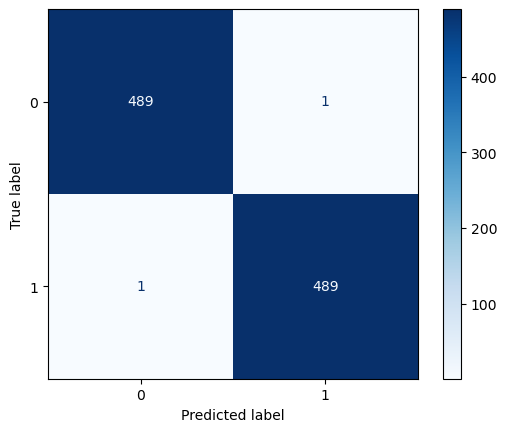

In [43]:
# Creating a confusion matrix to visualize how well my model predicts
y_pred_3rd = (y_proba_3rd > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_3rd)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**This model performed extremely well on the test set with 99.8% accuracy and just a .6 of a percent loss!** 

### Transfer Learning VGG16 Model base

In [44]:
# Instantiating VGG16 and making sure that the layers are frozen
core_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in core_model.layers:
    layer.trainable = False

In [45]:
# Fitting the model
vggmodel = Sequential()
vggmodel.add(core_model)
vggmodel.add(Flatten())
vggmodel.add(Dense(64, activation = 'relu'))
vggmodel.add(Dropout(0.2))
vggmodel.add(Dense(64, activation = 'relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(1, activation = 'sigmoid'))

vggmodel.compile(optimizer= 'adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
vgg16_history = vggmodel.fit(train_generator_aug3, epochs = 20, steps_per_epoch = 20, validation_data = validation_generator_aug3)

Epoch 1/20
20/20 [==============================] - 98s 5s/step - loss: 0.7754 - accuracy: 0.6469 - val_loss: 0.4902 - val_accuracy: 0.7610
Epoch 2/20
20/20 [==============================] - 100s 5s/step - loss: 0.3788 - accuracy: 0.8438 - val_loss: 0.1450 - val_accuracy: 0.9583
Epoch 3/20
20/20 [==============================] - 99s 5s/step - loss: 0.2089 - accuracy: 0.9269 - val_loss: 0.1049 - val_accuracy: 0.9759
Epoch 4/20
20/20 [==============================] - 105s 5s/step - loss: 0.1969 - accuracy: 0.9297 - val_loss: 0.0496 - val_accuracy: 0.9868
Epoch 5/20
20/20 [==============================] - 104s 5s/step - loss: 0.1317 - accuracy: 0.9594 - val_loss: 0.0462 - val_accuracy: 0.9956
Epoch 6/20
20/20 [==============================] - 113s 6s/step - loss: 0.1301 - accuracy: 0.9453 - val_loss: 0.0450 - val_accuracy: 0.9912
Epoch 7/20
20/20 [==============================] - 114s 6s/step - loss: 0.1191 - accuracy: 0.9516 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 8/20
20/2

In [46]:
# Evaluting the model accuracy and loss on the test set
test_loss, test_acc = vggmodel.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

31/31 [==============================] - 86s 3s/step - loss: 0.0352 - accuracy: 0.9878
Test loss: 0.03518854081630707 Test Acc: 0.9877551198005676


In [49]:
# Predicting the test values 
y_proba_4th = vggmodel.predict(test_generator) 

31/31 [==============================] - 89s 3s/step


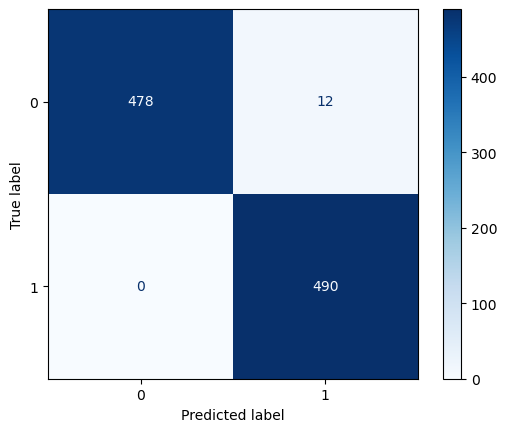

In [50]:
# Creating a confusion matrix to visualize how well my model predicts
y_pred_4th = (y_proba_4th > 0.5).astype('int')
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_4th)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Fine Tuning VGG16

In [51]:
# Unfreezing the last two layers in the VGG16
for layer in vggmodel.layers[0].layers[-3:-1]:
    layer.trainable = True

In [52]:
# Fine tuned VGG16 model
vgg16_history_fine = vggmodel.fit(train_generator_aug3, epochs = 5, steps_per_epoch = 20, validation_data = validation_generator_aug3)

Epoch 1/5
20/20 [==============================] - 101s 5s/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 107s 5s/step - loss: 0.0667 - accuracy: 0.9812 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 106s 5s/step - loss: 0.0443 - accuracy: 0.9812 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 107s 5s/step - loss: 0.0798 - accuracy: 0.9643 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 116s 6s/step - loss: 0.0702 - accuracy: 0.9734 - val_loss: 0.0042 - val_accuracy: 1.0000


**Both of the frozen and unfrozen models for VGG16 did not perform as well as my third CNN model**

## Evaluation

- The best model is my third CNN model that has an overall test accuracy score of 99.8%
- Accuracy is very important instead of using just precision or a recall score because of the potential consequences
- If a piece of rotten beef is classified as fresh and then sent out to the consumer that could scar the reputation of Hello Fresh
- On the other hand if a fresh piece of meat is classified as rotten and thrown out, you are just pouring money down the drain.
- Both sides of the coin are important and taken into consideration
- Classifying food is one of the first steps in online food service business and to be able to streamline that with my model can be a g